<a href="https://colab.research.google.com/github/iamsachi99/Mental-Health-In-Tech-Workplace/blob/main/Mental_Health_in_Tech_workplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health In Tech Workplace**

Problem

The task at hand is to predict whether employees in the tech industry seek mental health treatment based on various factors such as their demographics, work-related circumstances, and wellness program participation.

## Mount the google drive  and improt the nessesary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

### Loading

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML project/survey.csv")

In [ ]:
# CHeck
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [ ]:
#Number of rows and colomns
data.shape

(1259, 27)

In [ ]:
# data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Checking for null

In [ ]:
data.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


---
* The "comments" column contains too many missing values
*  TimeStamp columns only contains date and time

so they need to be dropped





In [ ]:
data.drop(columns=['Timestamp','comments'],inplace=True)

---


* work inference  is also have lot of null values so those needed to be renamed wit NA

In [ ]:
data['work_interfere'].fillna('NA', inplace = True)
data['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,465
NA,264
Never,213
Rarely,173
Often,144


---

* self employed have 18 missing values. Therefor I assumed that they are not self employed.

In [ ]:
data['self_employed'].fillna("No", inplace = True)
data['self_employed'].value_counts()

,count
self_employed,
No,1113
Yes,146


---

## Visualizing

Geograpical Propotion

In [ ]:
data['Country'].value_counts()

,count
Country,
United States,751
United Kingdom,185
Canada,72
Germany,45
Ireland,27
Netherlands,27
Australia,21
France,13
India,10


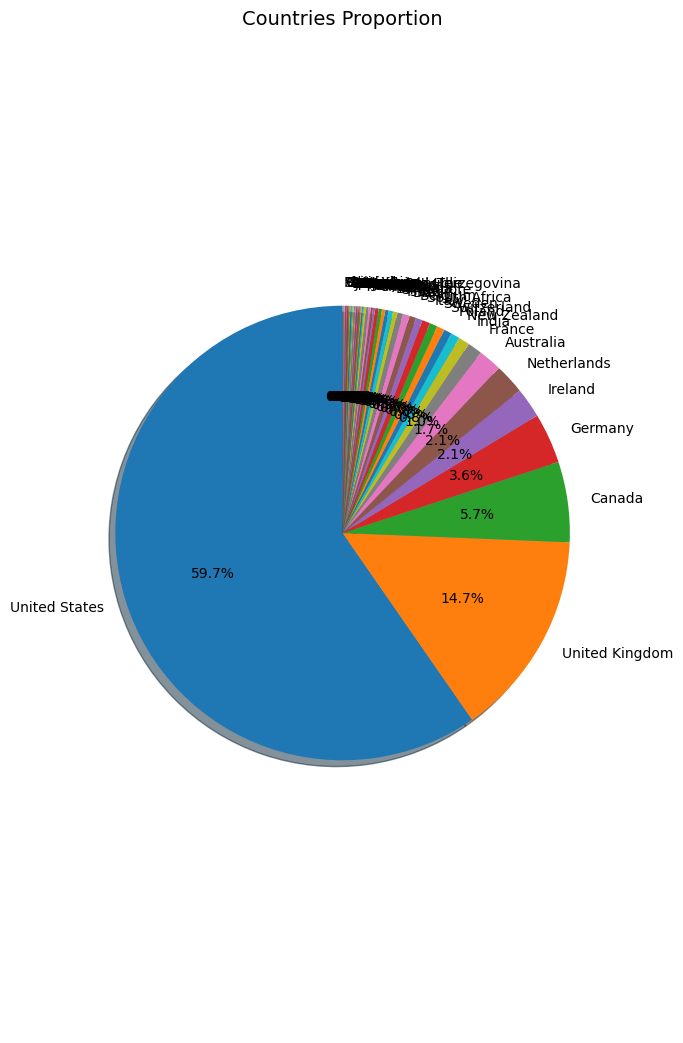

In [ ]:
# Countries proportion
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_axes((0,0,.5,1))
labels =  data['Country'].value_counts().index
sizes = data['Country'].value_counts()
percentages = sizes / 1259 * 100

ax1.pie(percentages, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

ax1.set_title("Countries Proportion", fontsize=14)

plt.savefig('distributionofsurvey.png')
plt.show()
plt.close()

 As the results in here, respondents came from the U.S with nearly 60% of the data. And second highest number of respondents came from the UK. The other countries have very little amount of data. therefore, I use only data that came from the US and UK for the analysis.

In [ ]:
# Filtering countries
countries = ['United States','United Kingdom']
data = data[data['Country'].isin(countries)]
data['Country'].value_counts()

,count
Country,
United States,751
United Kingdom,185


### Detecting Outliears

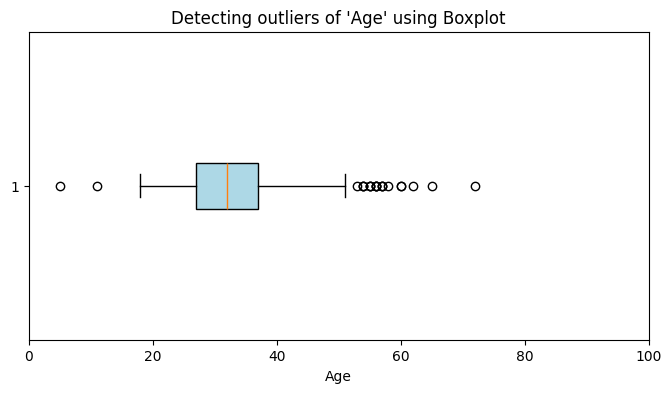

In [ ]:
# List of numerical columns
numerical_columns = ['Age']

# Loop through numerical columns to detect outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f"Detecting outliers of '{column}' using Boxplot")
    plt.xlabel(column)
    plt.xlim(0, 100)  #age range
    plt.show()

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

  # Calculating total number of outliers for each column
for column in numerical_columns:
    outliers = detect_outliers_iqr(data, column)
    print(f"Outliers in {column}:")
    if len(outliers) > 0:
        print(f"Number of outliers in {column}: {len(outliers)}")
    else:
        print(f"No outliers in '{column}' ")
    print('-' * 40)

Outliers in Age:
Number of outliers in Age: 26
----------------------------------------


Since there have less number of outliers I ignore them.

---

### Visualizing the distributions

(0.0, 100.0)

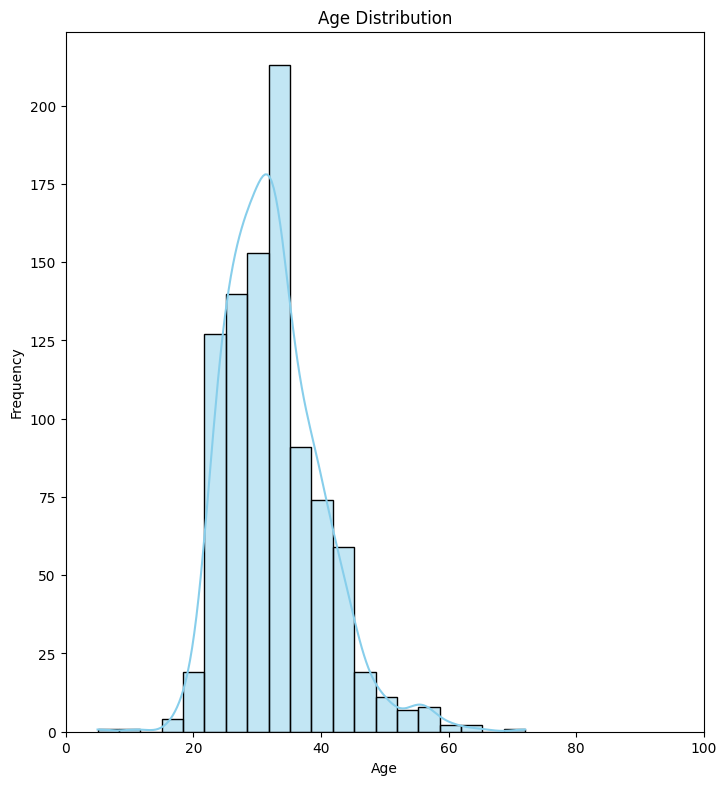

In [ ]:
plt.figure(figsize=(28, 20))

# Age
age_filtered = data['Age'].dropna()  # Drop NaN values
age_filtered = age_filtered[(age_filtered >= 0) & (age_filtered <= 100)]

plt.subplot(2, 3, 5)
sns.histplot(age_filtered, kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 100)

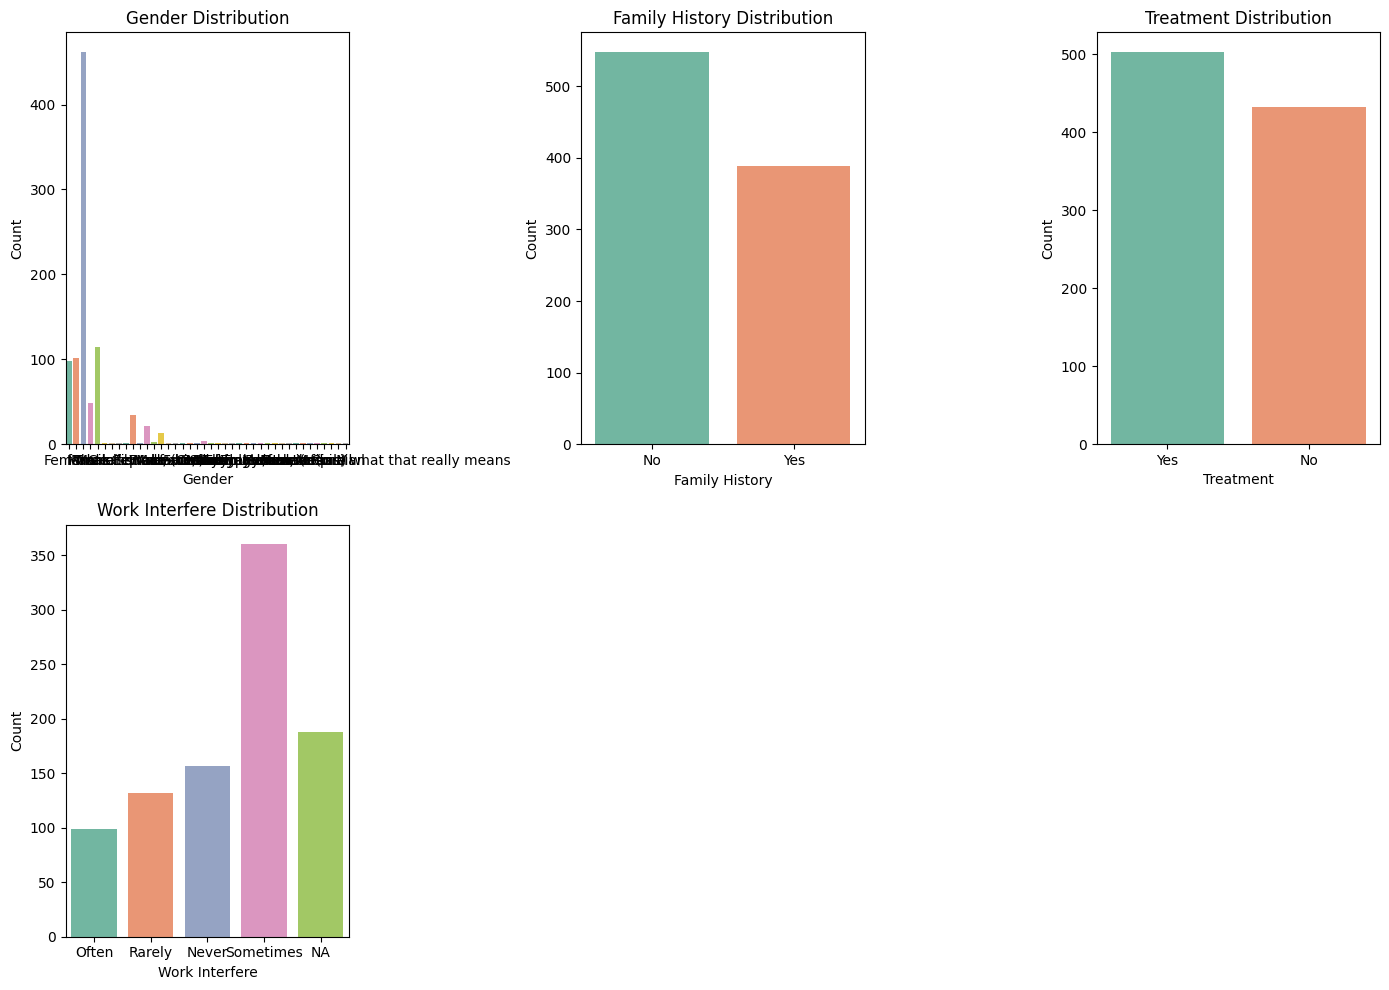

In [ ]:
plot_info = [
    ('Gender', 'Gender Distribution', 'Gender', 'Count'),
    ('family_history', 'Family History Distribution', 'Family History', 'Count'),
    ('treatment', 'Treatment Distribution', 'Treatment', 'Count'),
    ('work_interfere', 'Work Interfere Distribution', 'Work Interfere', 'Count')
]

plt.figure(figsize=(14, 10))

for idx, (column, title, xlabel, ylabel) in enumerate(plot_info, 1):
    plt.subplot(2, 3, idx)  # Define the subplot position
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# Show the plots
plt.tight_layout()
plt.show()

### plotting corelation heatmap

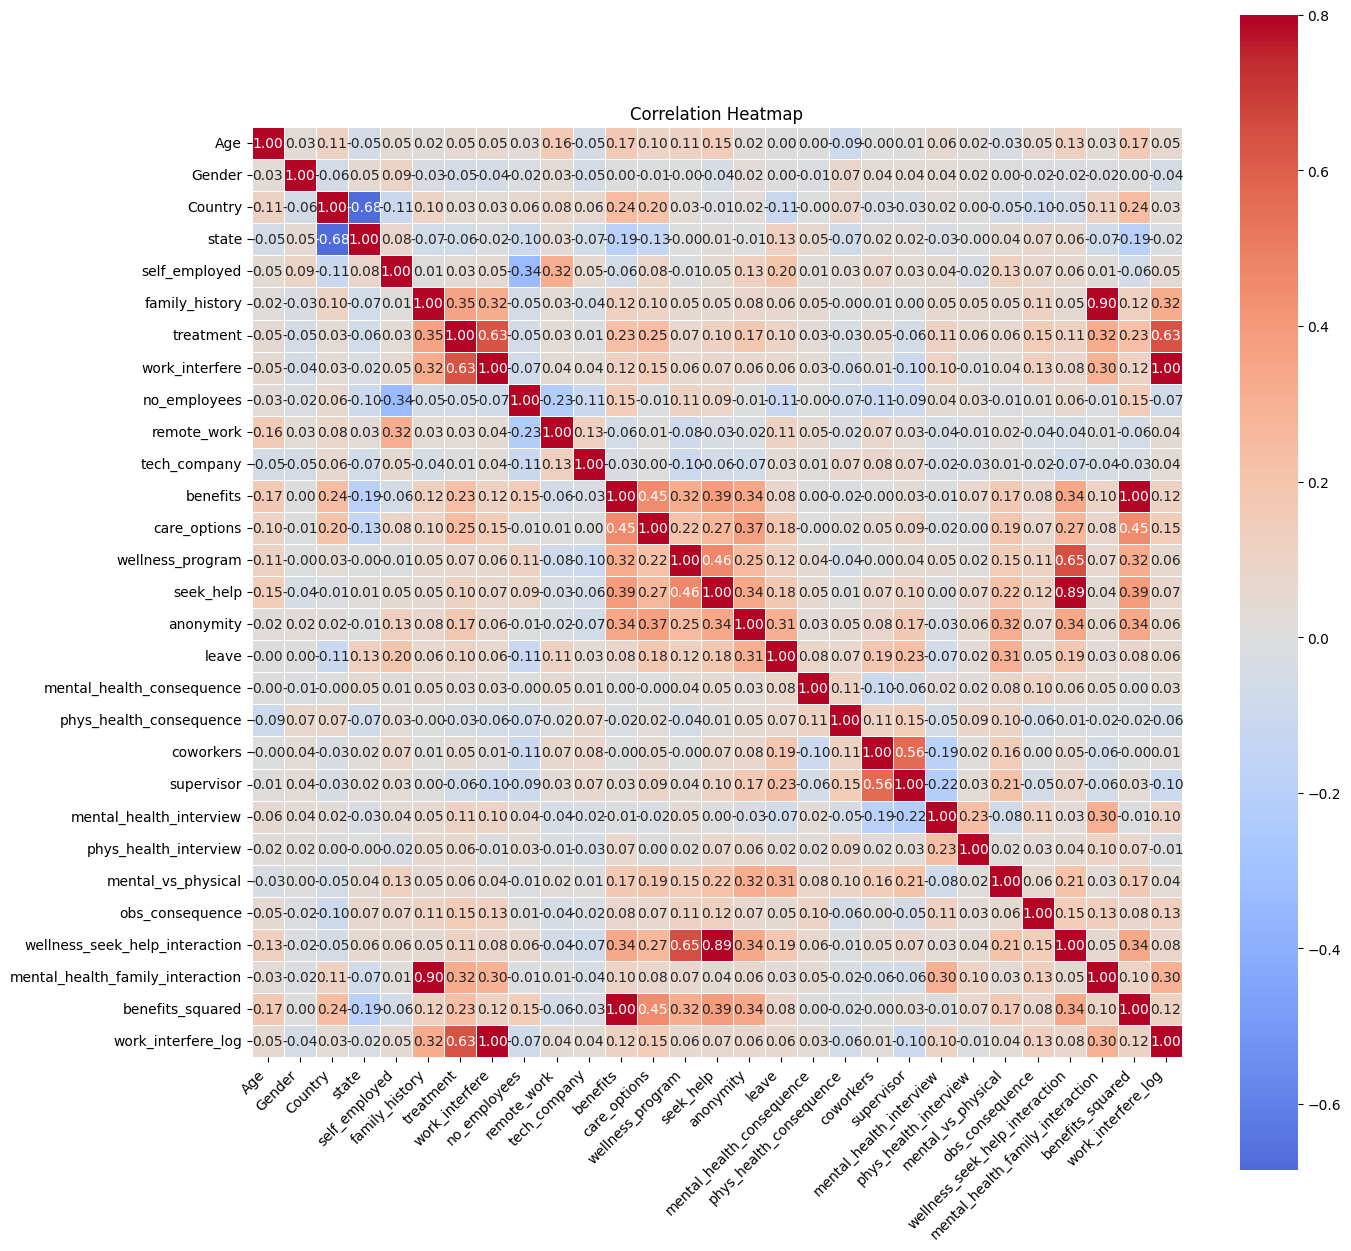

In [ ]:
processed_data = advanced_preprocessing(data)
processed_data = feature_engineering(processed_data)

# Assign the processed data to 'dfencode'
dfencode = processed_data

# Calculate the correlation
corr = dfencode.corr(method="spearman")
corr

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr,
            vmax=.8,
            center = 0,
            square=True,
            cbar=True,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5,
            annot_kws={'size': 10},
           )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing and Model Selection

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    f1_score,
    roc_curve,
)

## Handling Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

## Suppress warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Set random seed for reproducibility

In [ ]:
np.random.seed(42)

# Preprocessing Function

In [ ]:
def advanced_preprocessing(data):
    df = data.copy()

    # Identify column types
    numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
    categorical_features = df.select_dtypes(include=["object"]).columns

    # Handle missing values
    for col in numeric_features:
        df[col].fillna(df[col].median(), inplace=True)

    # Encode categorical variables
    for col in categorical_features:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    return df

# Feature Engineering Function

In [ ]:
def feature_engineering(data):
    # Create interaction features
    data["wellness_seek_help_interaction"] = data["wellness_program"] * data["seek_help"]
    data["mental_health_family_interaction"] = (
        data["mental_health_interview"] * data["family_history"]
    )

    # Create polynomial features for some numeric columns
    data["benefits_squared"] = data["benefits"] ** 2
    data["work_interfere_log"] = np.log1p(data["work_interfere"])

    return data

# Cross-Validation and Model Evaluation

In [ ]:
def train_with_cross_validation(X, y):
    # Defining models
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(random_state=42),
    }

    # Cross-validation setup
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = {}

    for name, model in models.items():
        print(f"\n{name} Cross-Validation:")
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
        print(f"Cross-Validation Accuracy: {cv_scores}")
        print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
        print(f"Std Dev of CV Accuracy: {np.std(cv_scores):.4f}")

        # Storing the results
        results[name] = {
            "Model": model,
            "CV Accuracy Scores": cv_scores,
            "Mean CV Accuracy": np.mean(cv_scores),
            "Std Dev CV Accuracy": np.std(cv_scores),
        }

    return results

# Train and Evaluate Ensemble Model

In [ ]:
def train_and_evaluate_ensemble(X_train, X_test, y_train, y_test, individual_results):
    # Train individual models on the training data
    models = {name: result["Model"] for name, result in individual_results.items()}
    for model in models.values():
        model.fit(X_train, y_train)

    # Create and train the ensemble
    ensemble = VotingClassifier(
        estimators=[
            ("rf", models["Random Forest"]),
            ("gb", models["Gradient Boosting"]),
            ("lr", models["Logistic Regression"])
        ],
        voting="soft",
        n_jobs=-1
    )
    ensemble.fit(X_train, y_train)

    # Calibrate the ensemble model
    calibrated_ensemble = CalibratedClassifierCV(ensemble, method="sigmoid", cv="prefit")
    calibrated_ensemble.fit(X_test, y_test)

    # Evaluate ensemble
    y_pred_ensemble = calibrated_ensemble.predict(X_test)
    y_pred_ensemble_proba = calibrated_ensemble.predict_proba(X_test)[:, 1]

    results = {
        "model": calibrated_ensemble,
        "Test Accuracy": accuracy_score(y_test, y_pred_ensemble),
        "F1 Score": f1_score(y_test, y_pred_ensemble, average="weighted"),
        "ROC AUC": roc_auc_score(y_test, y_pred_ensemble_proba),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_ensemble),
        "Classification Report": classification_report(y_test, y_pred_ensemble),
        "Predictions": y_pred_ensemble,
        "Probabilities": y_pred_ensemble_proba,
        "True_Values": y_test,
    }

    print("\nEnsemble Results:")
    print(f"Test Accuracy: {results['Test Accuracy']:.4f}")
    print(f"F1 Score: {results['F1 Score']:.4f}")
    print(f"ROC AUC: {results['ROC AUC']:.4f}")

    # Evaluate each individual model
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        f1 = f1_score(y_test, y_pred, average="weighted")
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"\n{model_name} Evaluation:")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(results["Confusion Matrix"], annot=True, fmt="d", cmap="coolwarm")
    plt.title("Confusion Matrix - Ensemble")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    # Plot ROC curves for all models
    plot_roc_curves(models, X_test, y_test, results)

    determine_best_model(models, X_test, y_test, results)

    return results

# ROC Curve Visualization

In [ ]:
def plot_roc_curves(models, X_test, y_test, ensemble_results):
    plt.figure(figsize=(10, 8))

    # Colors for different models
    colors = ['blue', 'green', 'red', 'purple']

    # Plot ROC curve for each individual model
    for (name, model), color in zip(models.items(), colors[:-1]):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.3f})')

    # Plot ROC curve for ensemble
    fpr, tpr, _ = roc_curve(ensemble_results["True_Values"], ensemble_results["Probabilities"])
    plt.plot(fpr, tpr, color=colors[-1],
             label=f'Ensemble (AUC = {ensemble_results["ROC AUC"]:.3f})')

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Customize plot
    plt.title('ROC Curves Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def determine_best_model(models, X_test, y_test, ensemble_results):
    """
    Determine the best model based on multiple metrics
    """
    model_metrics = {}

    # Calculate metrics for individual models
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        model_metrics[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred, average='weighted'),
            'roc_auc': roc_auc_score(y_test, y_pred_proba)
        }

    # Add ensemble metrics
    model_metrics['Ensemble'] = {
        'accuracy': ensemble_results['Test Accuracy'],
        'f1': ensemble_results['F1 Score'],
        'roc_auc': ensemble_results['ROC AUC']
    }

    # Create a comparison plot
    plt.figure(figsize=(12, 6))

    # Set up the metrics for plotting
    metrics = ['accuracy', 'f1', 'roc_auc']
    x = np.arange(len(metrics))
    width = 0.15
    multiplier = 0

    # Plot bars for each model
    for model_name, metric_values in model_metrics.items():
        offset = width * multiplier
        rects = plt.bar(x + offset, [metric_values[m] for m in metrics], width, label=model_name)
        multiplier += 1

    # Customize plot
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x + width * 2, ['Accuracy', 'F1 Score', 'ROC AUC'])
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Determine best model for each metric
    best_models = {}
    for metric in metrics:
        best_score = max(model_metrics.items(), key=lambda x: x[1][metric])
        best_models[metric] = (best_score[0], best_score[1][metric])

    # Print results
    print("\n=== Best Model Analysis ===")
    print(f"Best model by Accuracy: {best_models['accuracy'][0]} (Score: {best_models['accuracy'][1]:.4f})")
    print(f"Best model by F1 Score: {best_models['f1'][0]} (Score: {best_models['f1'][1]:.4f})")
    print(f"Best model by ROC AUC: {best_models['roc_auc'][0]} (Score: {best_models['roc_auc'][1]:.4f})")

    # Determine overall best model
    model_scores = {name: np.mean([metrics['accuracy'], metrics['f1'], metrics['roc_auc']])
                   for name, metrics in model_metrics.items()}
    overall_best = max(model_scores.items(), key=lambda x: x[1])

    print(f"\nOverall Best Model: {overall_best[0]}")
    print(f"Average Score: {overall_best[1]:.4f}")

# Main Execution Function


Random Forest Cross-Validation:
Cross-Validation Accuracy: [0.77777778 0.77380952 0.78571429 0.83730159 0.79681275]
Mean CV Accuracy: 0.7943
Std Dev of CV Accuracy: 0.0229

Gradient Boosting Cross-Validation:
Cross-Validation Accuracy: [0.82539683 0.81746032 0.81746032 0.84920635 0.84063745]
Mean CV Accuracy: 0.8300
Std Dev of CV Accuracy: 0.0128

Logistic Regression Cross-Validation:
Cross-Validation Accuracy: [0.79761905 0.78571429 0.80952381 0.84126984 0.76494024]
Mean CV Accuracy: 0.7998
Std Dev of CV Accuracy: 0.0254

Ensemble Results:
Test Accuracy: 0.7897
F1 Score: 0.7897
ROC AUC: 0.8817

Random Forest Evaluation:
F1 Score: 0.7778
ROC AUC: 0.8648

Gradient Boosting Evaluation:
F1 Score: 0.8292
ROC AUC: 0.8831

Logistic Regression Evaluation:
F1 Score: 0.7777
ROC AUC: 0.8631


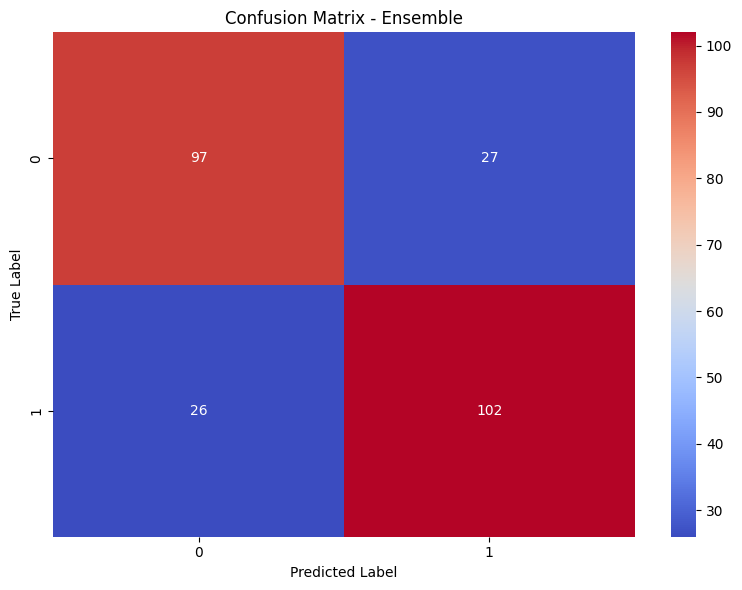

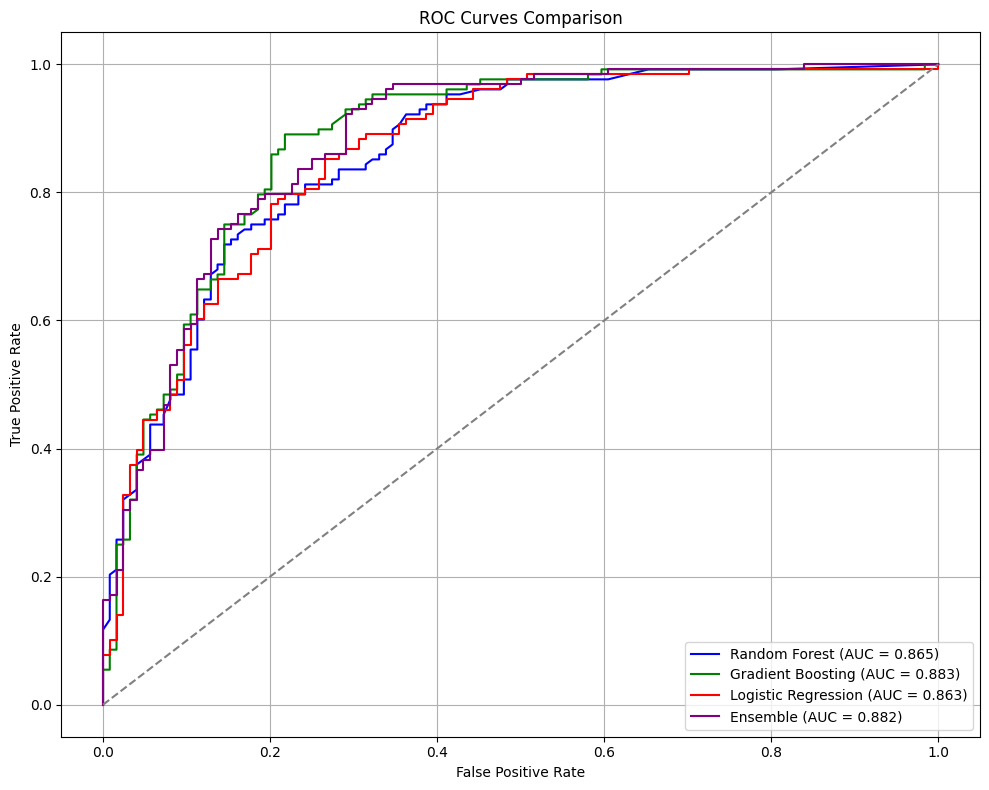

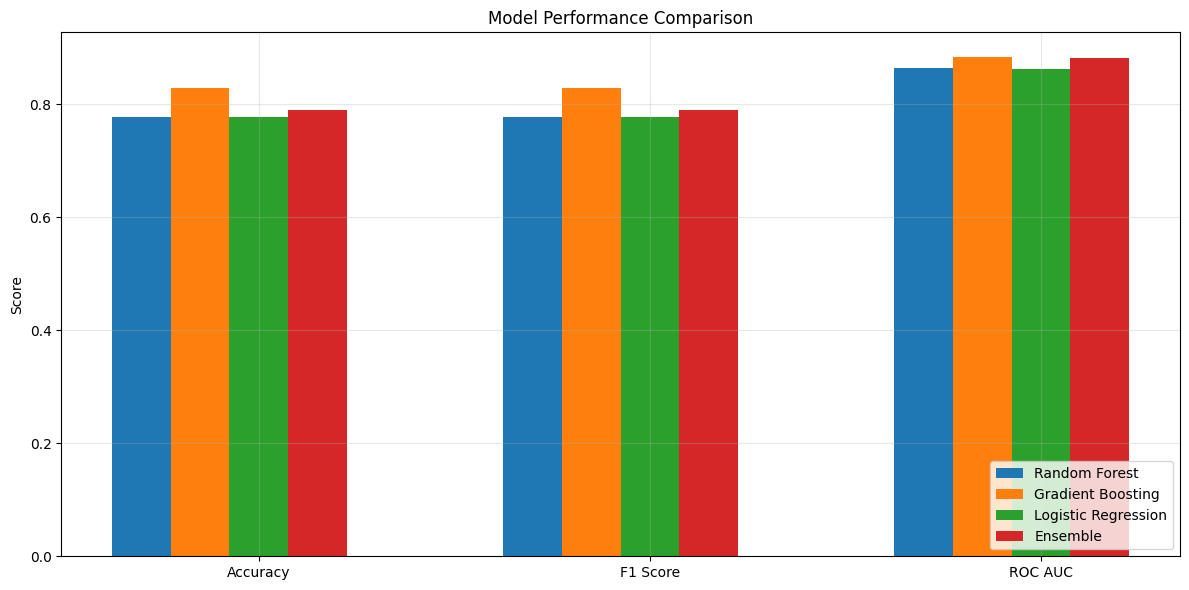


=== Best Model Analysis ===
Best model by Accuracy: Gradient Boosting (Score: 0.8294)
Best model by F1 Score: Gradient Boosting (Score: 0.8292)
Best model by ROC AUC: Gradient Boosting (Score: 0.8831)

Overall Best Model: Gradient Boosting
Average Score: 0.8472


In [ ]:
def main():
    # Load dataset
    data = pd.read_csv("/content/drive/MyDrive/ML project/survey.csv")

    # Preprocess data
    processed_data = advanced_preprocessing(data)
    processed_data = feature_engineering(processed_data)

    # Select features
    feature_columns = [
        "Gender", "wellness_program", "seek_help", "anonymity",
        "leave", "obs_consequence", "mental_health_interview",
        "family_history", "benefits", "care_options",
        "work_interfere", "wellness_seek_help_interaction",
        "mental_health_family_interaction", "benefits_squared",
        "work_interfere_log",
    ]

    X = processed_data[feature_columns]
    y = processed_data["treatment"]

    # Perform cross-validation
    cv_results = train_with_cross_validation(X, y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Train and evaluate ensemble model
    ensemble_results = train_and_evaluate_ensemble(
        X_train, X_test, y_train, y_test, cv_results
    )

if __name__ == "__main__":
    main()